In [1]:
from A2b_rhl72 import * 

# 1a

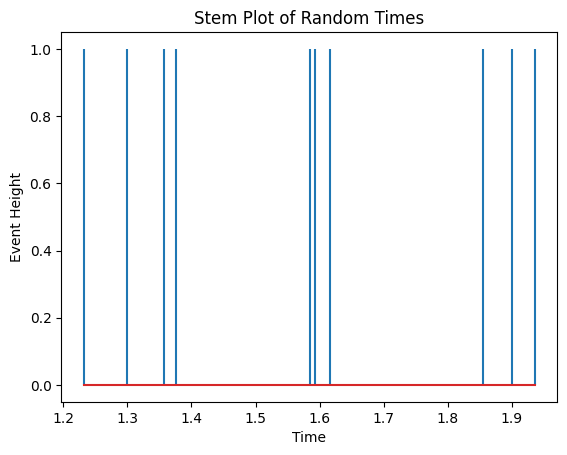

In [2]:
t = randtimes(10, t1=1, t2=2)
plotflash(t)


# 1b

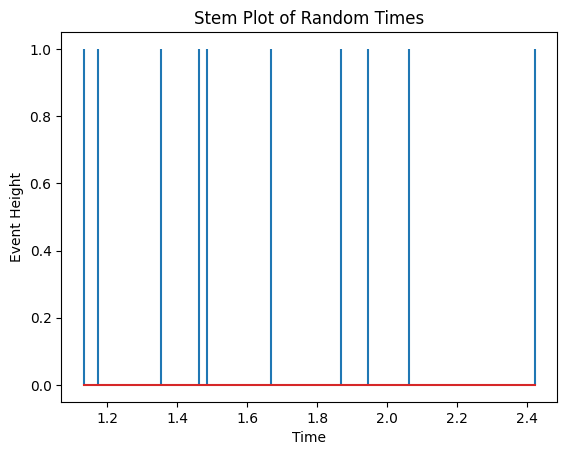

In [3]:
intervals = randintervals(10,10,1)

plotflash(intervals)

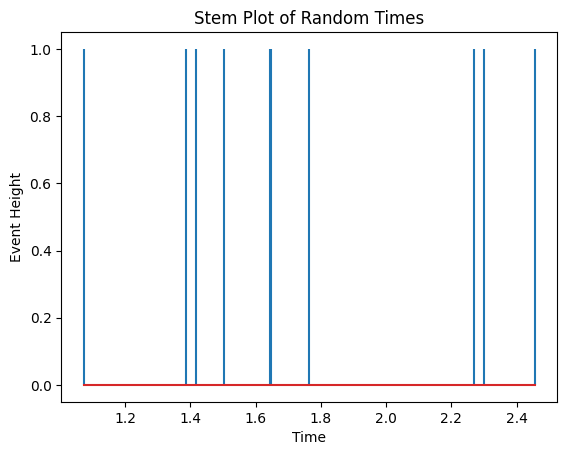

In [4]:
t = randintervals(10, lambd=10, t1=1)
plotflash(t)